## Guia de Problemas $N^o$ 2. Ejercicio computacional.
## Alumna: Maria Sol Vidal 

### Ejercicio 1
La mayor parte de los lenguajes de programación y muchos programas con orientación científica incluyen
generadores de números pseudoaleatorios con distribución uniforme en [0, 1). Cualquier conjunto de dichos
números constituye una muestra de una variable aleatoria continua (tema de la guía siguiente) con dicha
distribución, pero aquí nos interesa solamente el hecho de que pueden ser usados para simular experimentos
de Bernoulli. Mostrar computacionalmente que la probabilidad de que tal generador entregue un número
en [0, p) (0 ≤ p ≤ 1) es p (y en [p, 1) es 1 − p). Implemente, a partir de esta propiedad, un programa que
genere el resultado de una serie de n experimentos de Bernoulli independientes y cuente el número de éxitos
obtenido. Considere n y la probabilidad de éxito p como parámetros libres.

Para probar que la probabilidad de que dicho generador entregue un número
en [0, p) (0 ≤ p ≤ 1) es p (y en [p, 1) es 1 − p) me genero 1000 valores posibles de p. Asimismo le pido al generador con distribución uniforme entre [0,1) que me entregue 10000 números. Teniendo esas dos cosas, calculo para cada valor de p la probabilidad de que el generador me entregue un número menor a p. También calculo la probabilidad de que el generador me de un número en [p,1) (para cada valor de p).

In [1]:
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline 
import scipy as sp 
from scipy import stats
from scipy.optimize import curve_fit #cuadrados minimos 
import pandas as pd

In [2]:
a=np.linspace(0,1,1000) #van a ser los valores de p
b=[] # contiene la probabilidad de que tal generador entregue un número entre [0, p) para cada valor de p 
c=[] # contiene la probabilidad de que tal generador entregue un número entre [p, 1) para cada valor de p 
for i in a:
    s=np.random.random_sample((10000,)) # muestra de 10000 elementos de la distribucion uniforme en [0,1)
    sm=s[s<i] # me quedo con los valores de s que son menores a p
    sn=s[s>=i]  # me quedo con los valores de s que son mayores o iguales a p
    b.append(len(sm)/len(s)) # para cada valor de p, appendeo a b la proba de que el generador me de un nro menor a p
    c.append(len(sn)/len(s)) # lo mismo pero la probabilidad de que el generador me de un nro entre [p,1) para cada p

Ahora si, grafico la probabilidad de que el generador me de un número en [0,p) en función de p, lo que deberia dar una lineal con pendiente 1 (y ordenada cero) para demostrar lo que queria, es decir, para demostrar P(x$\in$[0,p))=p

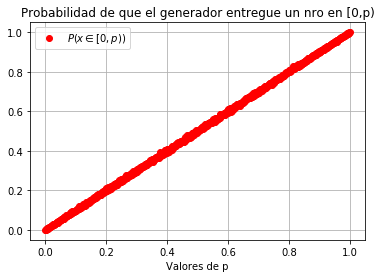

In [3]:
plt.plot(a, b, 'ro', label=r"$P(x\in[0,p))$")  

# Detalles del gráfico
plt.grid(True) 
plt.title('Probabilidad de que el generador entregue un nro en [0,p)')
plt.xlabel('Valores de p')
plt.legend(loc = 'best') 

plt.show() 
           

Se puede ver que la pendiente es cercana a 1, es decir, que se cumple la relación P(x$\in$[0,p))=p, que es lo que había que demostrar. Sin embargo, para verificarlo podemos ajustar la función lineal y ver cual es la pendiente que arroja el ajuste. 

In [4]:
f = lambda x, A, B: A * x + B #le paso la funcion que quiero ajustar  

popt, pcov = curve_fit(f, a, b ) #popt tiene los valores de los parámetros en orden: A, B
                                 #pcov en la diagonal tiene el sigma cuadrado de A y B 
                                  

print(" La pendiente arrojada por el ajuste es {} +/- {}".format(popt[0], (pcov[0,0])**1/2)) 

 La pendiente arrojada por el ajuste es 1.0001736251612672 +/- 9.680290998237704e-08


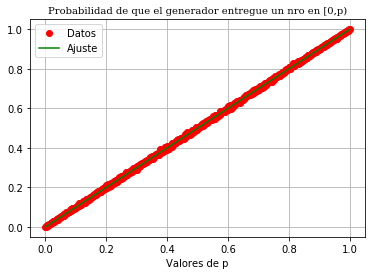

In [5]:
# Gráfico de los datos con su respectivo ajuste 
t = np.linspace(min(a), max(a), 1000) 
plt.plot(a, b, 'ro', label = 'Datos')
plt.plot(t, f(t, *popt), 'g-', label = 'Ajuste') 

plt.grid(True)
plt.title('Probabilidad de que el generador entregue un nro en [0,p)',
         fontname="serif",
         fontsize=10)
plt.xlabel('Valores de p')
plt.legend(loc = 'best')

plt.show()

La pendiente del ajuste efectivamente dio muy cercana a 1. Analogamente hago lo mismo con los datos de la probabilidad de que el generador entregue un nro entre [p,1) para cada valor de p. Lo que quiero probar es que P(x$\in$[p,1))=1-p, por lo que si grafico P(x$\in$[p,1)) en función de p me debería dar una lineal con pendiente -1 y ordenada 1. 

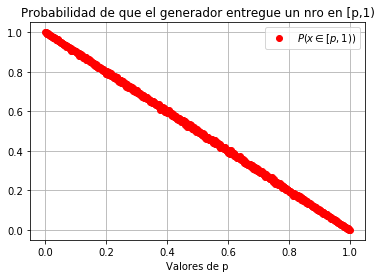

In [6]:

plt.plot(a, c, 'ro', label = r'$P(x\in[p,1))$') 

# Detalles del gráfico
plt.grid(True) 
plt.title('Probabilidad de que el generador entregue un nro en [p,1)')
plt.xlabel('Valores de p')
plt.legend(loc = 'best')  

plt.show() 


Ajusto la lineal para comprobar que se cumpla la relación P(x$\in$[p,1))=1-p

In [7]:
f = lambda x, A, B: A * x + B #le paso la funcion que quiero ajustar  

popt2, pcov2 = curve_fit(f, a, c )  

print(" La pendiente arrojada por el ajuste es {} +/- {}".format(popt2[0], (pcov2[0,0])**1/2)) 

 La pendiente arrojada por el ajuste es -1.000173625172335 +/- 9.679496731090682e-08


La pendiente nos da muy cercana a -1 y la ordenada a 1, por lo que efectivamente la probabilidad de que tal generador entregue un número en  [p, 1) es 1 − p, es decir, se cumple la relación P(x$\in$[p,1))=1-p

Lo próximo que pedía el enunciado era implementar, a partir de la propiedad demostrada, un programa que
genere el resultado de una serie de n experimentos de Bernoulli independientes y cuente el número de éxitos
obtenido, considerando n y la probabilidad de éxito p como parámetros libres.

In [8]:
def exitos (n,p): # n y p son parametros libres 
    s=np.random.random_sample((n,)) # genero un array con n nros de la distribucion uniforme en [0,1)
    sm=s[s<p] # me quedo solo con los que son mas chicos que p
    return len(sm) #el largo de sm es igual al nro de exitos 


Basicamente la idea es generar tantos números aleatorios de la distribucion uniforme en [0,1) como numero de intentos tenga (n). Luego cuento cuántos de esos numeros aleatorios son menores que p. Esto por la propiedad antes demostrada, es equivalente a decirle a la computadora que la probabilidad del éxito es p. 

### Ejercicio 2
Suponga que inciden exactamente n = 15 fotones sobre un detector con una eficiencia $\varepsilon$ = 0.75. Use el
programa escrito en el punto anterior para determinar cuántos fotones son detectados en un experimento
particular. Repita el experimento 1000 veces y realice un histograma de los resultados (i.e., del número de
fotones detectados en cada experimento). Compárelo con la distribución de probabilidad teórica para dicha
variable aleatoria. No olvide normalizar correctamente el histograma para realizar la comparación.


Voy a correr 1000 veces la función exitos, es decir, repetir el experimento 1000 veces. Cada corrida es independiente de las demás, lo que significa que los distintos experimentos son independientes entre sí. Por último, la probabilidad de detectar  $\varepsilon$  se mantiene constante para todas las repeticiones. 

In [9]:
resultados=[]
for i in range (0,1000): #repito el experimento 1000 veces 
    resultados.append(exitos (15,0.75)) #guardo el resultado de cada experimento en la lista resultados

Realizo el histograma (normalizado) de los 1000 resultados obtenidos y lo comparo con la densidad de probabilidad teórica, es decir, una binomial con n=15 (pues hay 15 intentos de detectar o no detectar) y p=0.75 ( la eficiencia del detector). 

In [10]:
def plot_histogram(data, bins, ticks=5, xlabel='X', ylabel='Histograma', normed=True, ecolor='', ax = None):
    N = len(data) #cantidad de  datos 
    num_bins = len(bins)
    xmin = min(bins)
    xmax = max(bins)
    if ax is None:
        ax = plt.gca()
    
    hist, _ = np.histogram(data, bins=bins, density=True) #devuelve el numero de cuentas en cada bin 

    df = pd.DataFrame({'histograma': hist, 'error': np.sqrt(hist/N)}) #  una tabla de excel, le pasamos un diccionario 

    ax = df.plot.bar(y='histograma', yerr='error', width=1, edgecolor='k', capsize=4, label=ylabel, 
                     ax=ax, colormap="Paired")

    #plt.xticks(np.linspace(0, num_bins - 2, ticks), np.linspace(xmin, xmax, ticks), rotation='horizontal');
    plt.xlabel(xlabel);
    return ax

En el Ejercicio 6 se habla de la asignación de error a los bines de los histogramas. 

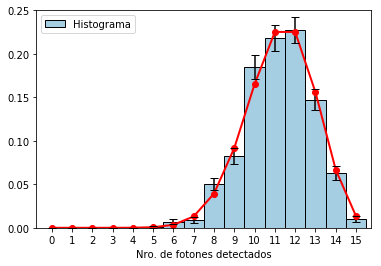

In [11]:
t = np.linspace(0, 15, 16) # Binomial toma valores discretos enteros
p=sp.stats.binom.pmf(t,15,0.75)
plt.plot(t,p ,'ro-', linewidth=2) 
plot_histogram(resultados, np.arange(17)-0.5,ticks=16, ecolor='r', xlabel='Nro. de fotones detectados')
plt.ylim((0, 0.25)) 
plt.xticks(t, rotation='horizontal')
plt.show()

Los puntos rojos son para remarcar que la distribución binomial es discreta. Sin embargo, como estos dificultan la visión de las barras de error, de ahora en más sólo se graficará la linea roja para la distribución teórica. 

Lo que se puede observar es que la distribución teórica se asemeja a la obtenida, aunque no es perfectamente  idéntica. Lo que espero es que si repito más veces el experimento, entonces el histograma se asemeje más a la distribución teórica. Veo si ocurre eso, repitiendo el experimento 10000 veces. 

In [12]:
resultados2=[]
for i in range (0,10000): #repito el experimento 10000 veces 
    resultados2.append(exitos (15,0.75)) #guardo el resultado de cada experimento en la lista resultados

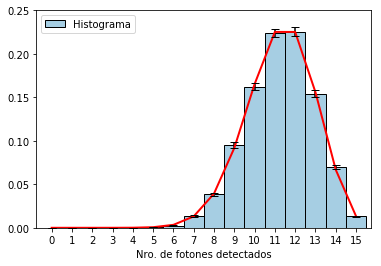

In [13]:
t = np.linspace(0, 15, 16) # Binomial toma valores discretos enteros 
p=sp.stats.binom.pmf(t,15,0.75)
plt.plot(t,p ,'r-', linewidth=2) 
plot_histogram(resultados2, np.arange(17)-0.5,xlabel='Nro. de fotones detectados')
plt.ylim((0, 0.25)) 
plt.xticks(t, rotation='horizontal')
plt.show()

Efectivamente si repito más veces el experimento, el histograma de los resultados se acerca más a la distribución teórica. 

### Ejercicio 3
Ahora considere una fuente de intensidad media I = 15 fot Simule el número de fotones emitidos por la
fuente en ∆t = 1 s del siguiente modo. Subdivida el intervalo ∆t en m >>1 subintervalos iguales dt (sugerencia: use m = 1000). Aproxime la probabilidad de que la fuente emita un fotón en dt como Idt, y desprecie
la probabilidad de emitir más de 1 fotón en el mismo intervalo (¿cómo justifica estas hipótesis?). Simule
entonces el número de fotones emitidos en cada dt usando el programa desarrollado en el punto 1 (¿por qué
es válido usar un programa que simula experimentos de Bernoulli?), y sumando sobre todos los dt calcule el
número total de fotones emitidos durante ∆t. Repita el experimento 1000 veces, construya un histograma de
los resultados y superponga a éste la distribución teórica correspondiente (no olvide normalizar). Discuta el
procedimiento y los resultados en base a las hipótesis del proceso de Poisson.

La aproximación de que la probabilidad de que la fuente emita 1 fotón en un dt sea $P_1(dt)=Idt$ es razonable, pues entonces cuán más largo sea el dt, más alta es la probabilidad de que se emita 1 fotón en ese dt. 

Por otro lado, se asume que la probabilidad de que se emita más de 1 fotón en un dt es despreciable. Esta hipótesis también es razonable si se toman intervalos dt muy cortos, en los cuales sea muy improbable que ocurra más de una emisión en un tiempo tan corto. En consecuencia, en un dt o no se emite o se emite 1 fotón, por la hipótesis antes mencionada. Por lo tanto, en un dt hay dos resultados posibles: no emitir o emitir 1 fotón, donde además la probabilidad de éxito (emisión) se mantiene constante. Además, se supone que la emisión de fotones en un dt es independiente con la emisión en otro dt disjunto de él, es decir, que  la fuente no tiene memoria de si emitió o no en un dt anterior. Es por todo esto que resulta válido simular el número de fotones emitidos en un dt con el programa de experimentos de Bernoulli, ya que es equivalente al experimento de tirar n veces la moneda, donde las tiradas son independientes y la probabilidad de éxito se mantiene constante. 

In [14]:
I=15 # numero de fotones por segundo en promedio 
t=1 # tiempo en segundos que mido 
intervalos=np.linspace(0,1,1000) # divido a t en 1000 subintervalos dt
p=I*(intervalos[1]-intervalos[0]) # probabilidad de que emita 1 foton en dt, la cual es constante
resul=[] # va a tener los resultados de los 1000 experimentos, donde cada experimento es medir por 1 segundo 
for i in range (1000):
    fotonessingle=[] # resultados para cada dt 
    for i in intervalos: # cada elemento de intervalos es un dt 
        fotonessingle.append(exitos(1,p)) # exitos con n=1 ya que desprecio la probabilidad de que
                                           #en un dt pueda emitir mas de 1 foton
    resul.append(sum(fotonessingle))
    

Realizo el histograma (normalizado) de los 1000 resultados obtenidos y lo comparo con la densidad de probabilidad teórica, es decir, una Poisson con $\mu=I\cdot t=15$ fotones (si mido 1 segundo). 

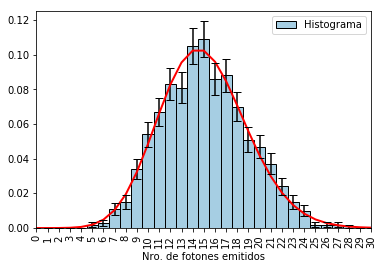

In [15]:
t = np.linspace(0, 30, 31) # Poisson toma valores discretos enteros 
p=sp.stats.poisson.pmf(t,15)
plt.plot(t,p ,'r-', linewidth=2) 
plot_histogram(resul, np.arange(32)-0.5, xlabel='Nro. de fotones emitidos')
plt.xlim((0, 30))
#plt.xticks(t, rotation='horizontal')
plt.show()

De nuevo, lo que se puede observar es que la distribución teórica se asemeja a la obtenida, aunque no es perfectamente  idéntica. Si repito más veces el experimento, entonces espero que el histograma se asemeje más a la distribución teórica. Repito 8000 veces el experimento.

In [16]:
p=I*(intervalos[1]-intervalos[0])
resul2=[] # va a tener los resultados de los 1000 experimentos, donde cada experimento es medir por 1 segundo 
for i in range (8000):
    fotonessingle=[] # resultados para cada dt 
    for i in intervalos: # cada elemento de intervalos es un dt 
        fotonessingle.append(exitos(1,p)) # exitos con n=1 ya que desprecio la probabilidad de que
                                           #en un dt pueda emitir mas de 1 foton
    resul2.append(sum(fotonessingle))

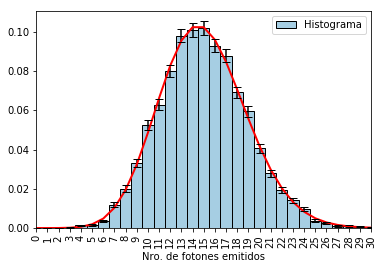

In [17]:
t = np.linspace(0, 30, 31) # Poisson toma valores discretos enteros 
p=sp.stats.poisson.pmf(t,15)
plt.plot(t,p ,'r-', linewidth=2) 
plot_histogram(resul2, np.arange(32)-0.5, xlabel='Nro. de fotones emitidos')
plt.xlim((0, 30))
plt.show()

Al repetir 8000 veces el experimento, el histograma de los resultados se asemeja más a la distribución teórica que repitiendolo 1000 veces.

### Ejercicio 4
Dado el resultado de cada uno de los 1000 experimentos del punto anterior, use el mismo programa para
calcular el número de fotones detectados por el detector del punto (2), suponiendo que éste opera durante
∆t = 1s, y que todos los fotones emitidos llegan a él (i.e., que el detector subtiende un ángulo sólido de
4π visto desde la fuente). Realice el histograma correspondiente y compárelo con la distribución teórica (no
olvide normalizar). Discuta los resultados (vea el ejercicio sobre la composición de Poisson con Binomial).


Lo que voy a hacer es agarrar los resultados de los 1000 experimentos de emisión en 1 seg (que están en la lista $resul$). Para cada resultado voy a simular la detección con el detector con eficiencia $\varepsilon=0.75$ con el programa de experimentos de Bernoulli, ya que hay dos resultados posibles: detectar o no detectar. Además, la probabilidad de deteccíon (éxito) es constante (es la eficiencia $\varepsilon=0.75$) y las detecciones de los n fotones que le llegan al detector son independientes. Cabe aclarar que el número de fotones n que le llegan al detector ahora NO está fijo como en el Ejercicio 2, sino que fluctua con una distribución Poissoneana como se vió en el ejercicio anterior. 

In [20]:
fuentemasdet=[]
for i in resul: # resul tiene los resultados de los 1000 experimentos de emision en 1 seg 
    fuentemasdet.append(exitos (i,0.75))

Realizo el histograma (normalizado) de los 1000 resultados  y lo comparo con la densidad de probabilidad teórica, es decir, una Poisson con $\mu=I\cdot \Delta  t\cdot \varepsilon=15\cdot0.75=11.25$ fotones. Esto último resulta asi, pues como se vió en clase la composición de una distribución poissoneana con $\mu$ con una binomial con $p$ da como resultado una poissoneana con $\mu ^{'}$=$\mu$$\cdot p$.

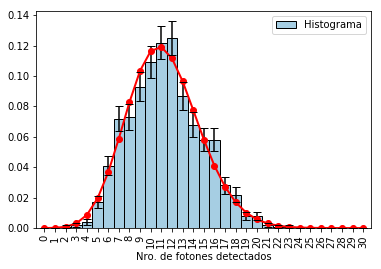

In [21]:
t = np.linspace(0, 30, 31) # Poisson toma valores discretos enteros 
p=sp.stats.poisson.pmf(t,15*0.75)
plt.plot(t,p ,'ro-', linewidth=2) 
plot_histogram(fuentemasdet, np.arange(32)-0.5, xlabel='Nro. de fotones detectados')

plt.show()

La distribución teórica se asemeja a la obtenida. Si repito más veces el experimento, entonces espero que el histograma se asemeje más a la distribución teórica. 

### Ejercicio 5
Para ahorrar tiempo, usted podría haber considerado la emisión y detección de cada fotón en forma conjunta,
suponiendo una probabilidad efectiva (¿de qué valor?) para este proceso (¿cómo justifica esta hipótesis?).
Realice la simulación de este modo, grafique los histogramas y sus correspondientes distribuciones teóricas.
Muestre que el resultado es el mismo que el del punto anterior (en sentido estadístico). Discuta el procedimiento y los resultados a la luz de la composición de un proceso de Poisson con uno de Bernoulli.


Si considero la emisión y detección de cada fotón en forma conjunta, tengo que modificar la probabilidad $p$ que utilizo para los experimentos de Bernoulli en cada dt. Esta $p$ en el Ejercicio 3 era la probabilidad de que haya 1 emisión en un dt $p=P_1(dt)=Idt$. Ahora que considero emisión y detección en cada dt en forma conjunta, esta $p$ pasa a ser una probabilidad efectiva de emisión y detección para un dt, es decir, $p_{ef}=p\cdot \varepsilon=I\cdot dt \cdot \varepsilon$, donde I=15 es la intensidad media de la fuente y $\varepsilon=0.75$ es la eficiencia del detector. Cabe aclarar que esta probabilidad $p$ sigue siendo constante, por lo que es válido usar el programa de experimentos de Bernoulli del Ejercicio2. 

In [22]:
I=15 # numero de fotones por segundo en promedio 
t=1 # tiempo en segundos que mido 
intervalos=np.linspace(0,1,1000) # divido a t en 1000 subintervalos dt
p=I*(intervalos[1]-intervalos[0])*0.75 # probabilidad efectiva 
resul3=[] # va a tener los resultados de los  experimentos
for i in range (1000):
    fotonessingle=[] # resultados para cada dt 
    for i in intervalos: # cada elemento de intervalos es un dt 
        fotonessingle.append(exitos(1,p)) 
    resul3.append(sum(fotonessingle))

Realizo el histograma (normalizado) de los 1000 resultados  y lo comparo con la densidad de probabilidad teórica, es decir, una Poisson con $\mu=I\cdot \Delta  t\cdot \varepsilon=15\cdot0.75=11.25\sim 11 $ fotones. Como ya se mencionó anteriormente, esta distribución poissonena proviene de la composición de una distribución de Poisson (correspondiente a la variable aleatoria "número de emisiones si mido 1 seg.") con una distribución binomial (de la variable aleatoria "número de fotones que detecta el detector"). La distribución de Poisson resultante tiene un  $\mu ^{'}$=$\mu$$\cdot p=I\cdot \Delta t \cdot \varepsilon=11.25$.

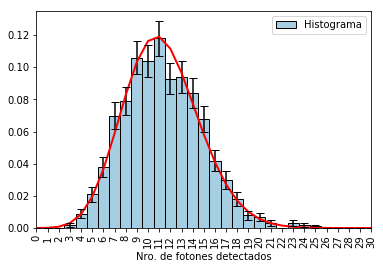

In [23]:
t = np.linspace(0, 30, 31)
p=sp.stats.poisson.pmf(t,15*0.75)
plt.plot(t,p ,'r-', linewidth=2) 
plot_histogram(resul3, np.arange(32)-0.5,  xlabel='Nro. de fotones detectados')
plt.xlim((0, 30))
plt.show()

La distribución teórica se asemeja a la obtenida, aunque se observa una diferencia entre la distribución teórica y el histograma cerca del valor más esperado $\sim 11 fotones$. De nuevo si repito más veces el experimento, entonces espero que el histograma se asemeje más a la distribución teórica y esta diferencia se atenue. Pruebo repitiendo 8000 veces el experimento

In [24]:
p=I*(intervalos[1]-intervalos[0])*0.75 # probabilidad efectiva 
resul4=[] # va a tener los resultados de los  experimentos
for i in range (8000):
    fotonessingle=[] # resultados para cada dt 
    for i in intervalos: # cada elemento de intervalos es un dt 
        fotonessingle.append(exitos(1,p)) 
    resul4.append(sum(fotonessingle))

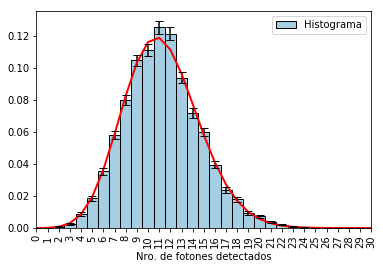

In [25]:
t = np.linspace(0, 30, 31)
p=sp.stats.poisson.pmf(t,15*0.75)
plt.plot(t,p ,'r-', linewidth=2) 
plot_histogram(resul4, np.arange(32)-0.5, xlabel='Nro. de fotones detectados')
plt.xlim((0, 30))
plt.show()

Efectivamente, repitiendo más veces el experimento la distribución teórica se parece más al histograma de resultados. Ahora voy a comparar los histogramas de los ejericios 4 y 5 cuando repito 8000 veces el experimento en cada caso (deberían ser iguales).

In [26]:
fuentemasdet2=[]
for i in resul2: # resul tiene los resultados de los 8000 experimentos de emision en 1 seg 
    fuentemasdet2.append(exitos (i,0.75))

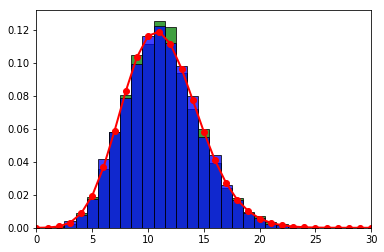

In [27]:
t = np.linspace(0, 30, 31)
p=sp.stats.poisson.pmf(t,15*0.75)
plt.plot(t,p ,'ro-', linewidth=2) 
plt.hist(resul4, bins=np.arange(32)-0.5, density=True, facecolor='green',  edgecolor='black', alpha=0.75)
plt.hist(fuentemasdet2, bins=np.arange(32)-0.5, density=True, facecolor='blue',  edgecolor='black', alpha=0.75)
plt.xlim((0, 30))
plt.show()

Lo que se puede ver es que los histogramas de los ejs 4 y 5 para 8000 repeticiones se solapan casi completamente entre ellos, por lo que el resultado de este ejercicio es el mismo que el del ej. anterior (en sentido estadístico), que es lo que se esperaba por lo que se discutió anteriormente sobre la composición de la distribución poissoneana con una binomial. Por último, ambos histogramas se asemejan a la distribución teórica.

### Ejercicio 6
¿Qué distribución espera para que el número de datos en una determinada clase (bin) de un histograma y
por qué? Use la desviación estándar como una estimación de la incerteza de dicha variable y grafique barras
de error sobre todos los histogramas realizados. Discuta el sentido en que deben interpretarse las posibles
discrepancias entre las distribuciones de probabilidad teóricas y los histogramas.

En primer lugar, se podría pensar a la distribución de la variable aleatoria ¨número de de datos que caen en un determinado bin¨ como una binomial. El $éxito$ corresponde a que un dato caiga en este bin en particular. El fracaso corresponde a que un dato caiga en cualquier otro bin que no sea el que estamos interesados. El número de intentos n de la binomial es el número de datos del histograma. Además, la probabilidad de éxito $p$ la calcularía como el número de datos que cayeron en el bin en mi histograma sobre el número total de datos del histograma N. Con eso dicho, el error de un determinado bin sería $\sigma=\sqrt{ np(1-p)}$. 

Por otro lado, si el número total de datos de mi histograma es mucho más grande que el número de bins, puedo pensar a la distribución del número de datos que cae en un bin como poissoneana. Pues tendriamos un número grande de datos intentando caer en un determinado bin.  Tendremos muchos intentos (muchos datos) para realizar algo con probabilidad muy baja (caer en un determinado bin), lo que correspondería al límite de la binomial con $n\rightarrow\infty$ y $p\rightarrow 0$, es decir, el límite donde la binomial tiende a una Poisson. Dicho esto, el error que le asigno a un bin es el de la poissoneana $\sigma=\sqrt\mu=\sqrt X$, donde  aproximo a $\mu$ por $X$, es decir, el número de datos que cayó en el bin en mi histograma. Además, como a todos los histogramas los normalize por $N$ (número total de datos del histograma) para poder compararlo con la distribución teórica, al error también lo tengo que normalizar por $N$, es decir, $\frac{\sigma}{N}=\frac{\sqrt\mu}{N}=\frac{\sqrt X}{N}$. En todos los histogramas de este trabajo, éste fue el error que se le asigno a la altura de un bin.   

Para ver si esto es válido, voy a ver como varia la altura de un determinado bin. Para eso primero repito 1000000 veces el experimento de Bernoulli del Ejercicio 2.

In [28]:
prueba=[]
for i in range (0,1000000): #repito el experimento 
    prueba.append(exitos (15,0.75)) #guardo el resultado de cada experimento en la lista resultados

Ahora agrupo las 1000000 repeticiones de a 150. Es decir repito 1000000/150 veces el experimento de medir 150 veces. 

In [29]:
lista_nueva = []
for i in range(0, len(prueba), 150):
    lista_nueva.append(prueba[i:i+150])


Para cada set de 150 resultados me fijo cuántos eventos cayeron en el bin número 10 y me armo una lista con las distintas alturas del bin 10, para luego hacer el histograma de la altura del bin 10.

In [30]:
databin=[]
for i in lista_nueva:
    hist, _ = np.histogram(i, np.arange(17)-0.5) #devuelve el numero de cuentas en cada bin
    databin.append(hist[10])


Ahora calculo el valor esperado (en promedio) para la altura del bin nro. 10 a partir de mis datos, el cual después voy a usar como $\mu$ de la distribución teórica. 

In [31]:
sum(databin)/len(databin)

24.771111444427778

Hago el histograma para la altura del bin nro. 10 (número de datos que caen en el bin 10) y lo comparo con la distribución teórica, es decir, con una poissoneana con $\mu = 24.771\sim 25$ (lo aproximo por el entero más cercano).

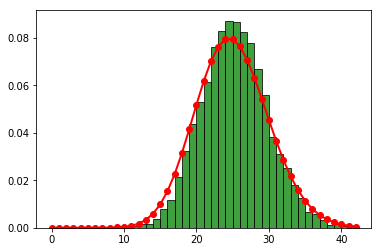

In [33]:
plt.hist(databin, bins=np.arange(max(databin)+2), density=True, facecolor='green',  edgecolor='black', alpha=0.75)
t = np.arange(max(databin)+2)
p=sp.stats.poisson.pmf(t,25)
plt.plot(t,p ,'ro-', linewidth=2) 

Se observa que se parece bastante a la distribución teórica. Chequeo si sigue ocurriendo lo mismo si en vez de agrupar en 150 repeticiones, agrupo en 200 repeticiones. 

In [35]:
lista_nueva2 = []
for i in range(0, len(prueba), 200):
    lista_nueva2.append(prueba[i:i+200])
    
databin2=[]
for i in lista_nueva2:
    hist, _ = np.histogram(i, np.arange(17)-0.5) #devuelve el numero de cuentas en cada bin
    databin2.append(hist[10])
sum(databin2)/len(databin2)

33.0298

Hago el histograma para la altura del bin nro. 10 (número de datos que caen en el bin 10) y lo comparo con la distribución teórica, es decir, con una poissoneana con $\mu = 33.0298\sim 33$ (lo aproximo por el entero más cercano).

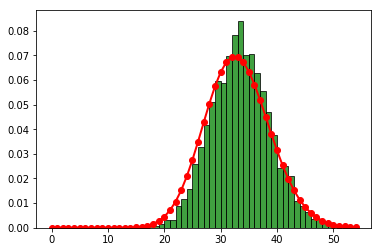

In [36]:
plt.hist(databin2, bins=np.arange(max(databin2)+2), density=True, facecolor='green',  edgecolor='black', alpha=0.75)
t = np.arange(max(databin2)+2)
p=sp.stats.poisson.pmf(t,33)
plt.plot(t,p ,'ro-', linewidth=2) 

Como se puede ver, si los reagrupo de a 200 repeticiones, el histograma para la altura del bin nro. 10 se sigue asemejando a una distibución poissoneana con el $\mu$ dado por el promedio de la altura para ese bin. Por lo que podemos asignarle como error a la altura del bin el de la poissoneana $\sigma=\sqrt\mu=\sqrt X$, donde X es la altura del bin en mi histograma. La barras de error deben ser interpretadas como rangos donde la altura del bin puede estar por fluctuaciones estadísticas. Esto quiere decir que si repito el histograma la altura del bin caera dentro de la barra de error con cierta probabilidad. Esto último puede llegar a explicar las discrepancias entre las distribuciones de probabilidad teóricas y los histogramas que vimos anteriormente. 